## This is a Heading

In [28]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


In [90]:
df=pd.read_csv('Data/new/loan-train.csv')
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [86]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [30]:
df.shape

(614, 13)

In [31]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [32]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [33]:
df.drop(columns=['Loan_ID'], inplace=True)

In [34]:
print(df.columns)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [35]:
# Remove leading spaces from column names
df.rename(columns=lambda x: x.strip(), inplace=True)

# Display the updated DataFrame
print(df.columns)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [46]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply label encoding to the 'education' column
df['Education'] = label_encoder.fit_transform(df['Education'])

# Apply label encoding to the 'self_employed' column
df['Self_Employed'] = label_encoder.fit_transform(df['Self_Employed'])

df['Property_Area'] = label_encoder.fit_transform(df['Property_Area'])

df['Married'] = label_encoder.fit_transform(df['Married'])

df['Gender'] = label_encoder.fit_transform(df['Gender'])

df['Dependents'] = label_encoder.fit_transform(df['Dependents'])

# Apply label encoding to the 'loan_status' column
df['Loan_Status'] = label_encoder.fit_transform(df['Loan_Status'])

# Display the updated DataFrame with encoded columns
print(df[['Education', 'Self_Employed','Loan_Status']])


     Education  Self_Employed  Loan_Status
1            0              0            0
2            0              1            1
3            1              0            1
4            0              0            1
5            0              1            1
..         ...            ...          ...
609          0              0            1
610          0              0            1
611          0              0            1
612          0              0            1
613          0              1            0

[517 rows x 3 columns]


In [47]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [48]:
df.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [49]:
df['Loan_Status']=df['Loan_Status'].astype('category')

In [50]:
df.dtypes

Gender                  int64
Married                 int64
Dependents              int64
Education               int64
Self_Employed           int64
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area           int64
Loan_Status          category
dtype: object

In [51]:
## Missing values

df.dropna(inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [43]:
df.isnull().sum(), df.shape

(Gender               0
 Married              0
 Dependents           0
 Education            0
 Self_Employed        0
 ApplicantIncome      0
 CoapplicantIncome    0
 LoanAmount           0
 Loan_Amount_Term     0
 Credit_History       0
 Property_Area        0
 Loan_Status          0
 dtype: int64,
 (517, 12))

In [52]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, normalize

# Create a StandardScaler instance
scaler = StandardScaler()
min_max = MinMaxScaler()
norm = normalize()

# Define the feature columns (X) and target column (y)
X = df.drop(columns=['Loan_Status'])  # Drop 'loan_status' column to get feature columns
y = df['Loan_Status']  # Target variable



# # Select only the numerical columns for scaling (excluding 'loan_status')
numerical_columns = ['ApplicantIncome','CoapplicantIncome', 'LoanAmount']
min_max_cols = ['Loan_Amount_Term']
# Apply scaling to the numerical columns
scaler.fit(X[numerical_columns])
X[numerical_columns] = scaler.transform(X[numerical_columns])
min_max.fit(X[min_max_cols])
X[min_max_cols] = min_max.transform(X[min_max_cols])
# Display the scaled feature variables (X) and the target variable (y)
print("Scaled Feature Variables (x):")
print(X.head())

print("\nTarget Variable (y):")
print(y.head())


Scaled Feature Variables (x):
   Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
1       1        1           1          0              0        -0.148252   
2       1        1           0          0              1        -0.393063   
3       1        1           0          1              0        -0.457552   
4       1        0           0          0              0         0.070886   
5       1        1           2          0              1        -0.019274   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
1          -0.018735   -0.213878           0.72973             1.0   
2          -0.611570   -0.944680           0.72973             1.0   
3           0.315422   -0.308175           0.72973             1.0   
4          -0.611570   -0.060646           0.72973             1.0   
5           1.037988    1.424533           0.72973             1.0   

   Property_Area  
1              0  
2              2  
3              2  
4         

In [53]:
X.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,0,0,-0.148252,-0.018735,-0.213878,0.72973,1.0,0
2,1,1,0,0,1,-0.393063,-0.611570,-0.944680,0.72973,1.0,2
3,1,1,0,1,0,-0.457552,0.315422,-0.308175,0.72973,1.0,2
4,1,0,0,0,0,0.070886,-0.611570,-0.060646,0.72973,1.0,2
5,1,1,2,0,1,-0.019274,1.037988,1.424533,0.72973,1.0,2


In [54]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
x_train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

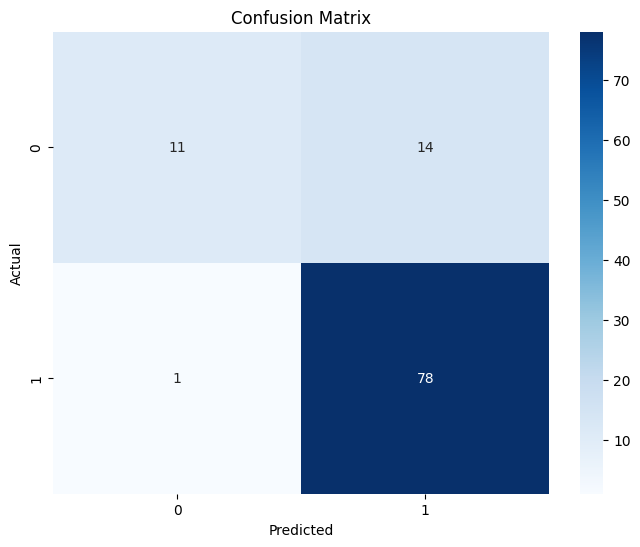

Accuracy: 0.8557692307692307
Precision: 0.8643743032329988
Recall: 0.8557692307692307
F1 Score: 0.8359138490717439
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.44      0.59        25
           1       0.85      0.99      0.91        79

    accuracy                           0.86       104
   macro avg       0.88      0.71      0.75       104
weighted avg       0.86      0.86      0.84       104



In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a LogisticRegression instance
logistic_reg = LogisticRegression(random_state=42)

# Train the logistic regression model
logistic_reg.fit(x_train, y_train)

# Predict on the test set
y_pred = logistic_reg.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)


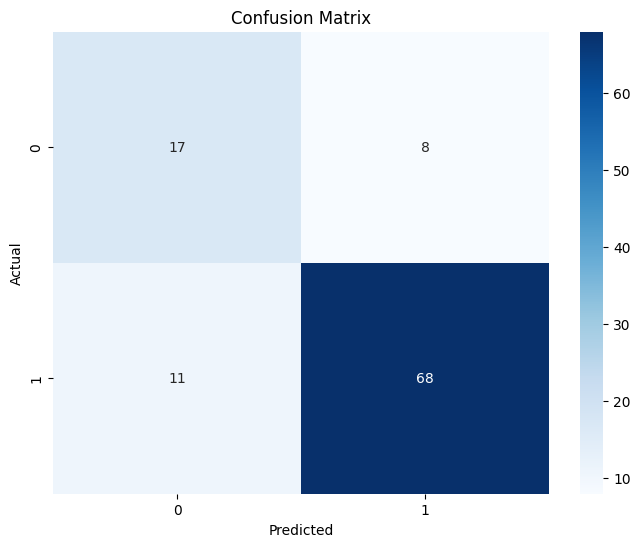

Decision Tree Classifier Metrics:
Accuracy: 0.8173076923076923
Precision: 0.8256036726431464
Recall: 0.8173076923076923
F1 Score: 0.8207102392434102
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.68      0.64        25
           1       0.89      0.86      0.88        79

    accuracy                           0.82       104
   macro avg       0.75      0.77      0.76       104
weighted avg       0.83      0.82      0.82       104



In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DecisionTreeClassifier instance
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the decision tree model
decision_tree.fit(x_train, y_train)

# Predict on the test set
y_pred = decision_tree.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("Decision Tree Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

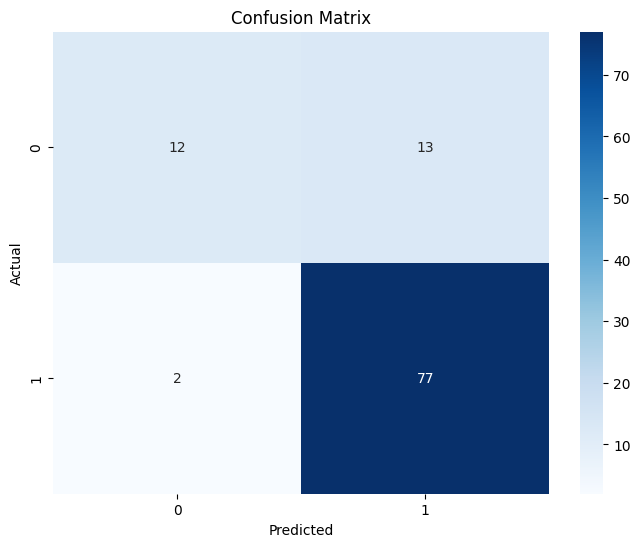

Random Forest Classifier Metrics:
Accuracy: 0.8557692307692307
Precision: 0.8559371184371185
Recall: 0.8557692307692307
F1 Score: 0.8401228948566225
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.48      0.62        25
           1       0.86      0.97      0.91        79

    accuracy                           0.86       104
   macro avg       0.86      0.73      0.76       104
weighted avg       0.86      0.86      0.84       104



In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a RandomForestClassifier instance
random_forest = RandomForestClassifier(random_state=42)

# Train the random forest model
random_forest.fit(x_train, y_train)

# Predict on the test set
y_pred = random_forest.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("Random Forest Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

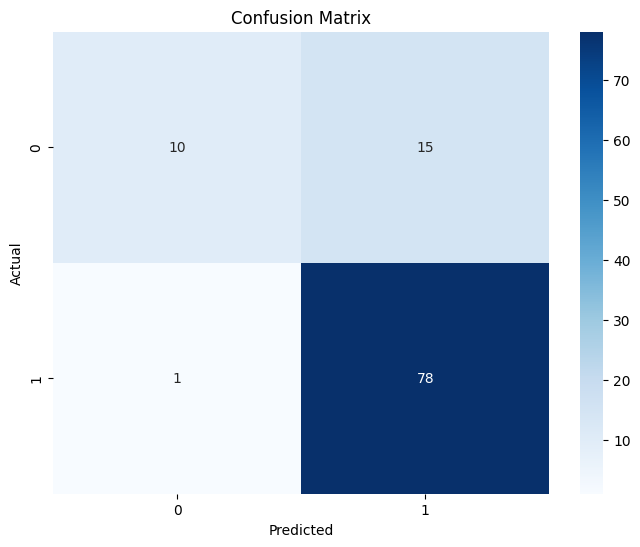

SVM Classifier Metrics:
Accuracy: 0.8461538461538461
Precision: 0.855628242725017
Recall: 0.8461538461538461
F1 Score: 0.8225004969191017
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.40      0.56        25
           1       0.84      0.99      0.91        79

    accuracy                           0.85       104
   macro avg       0.87      0.69      0.73       104
weighted avg       0.86      0.85      0.82       104



In [59]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create an SVC (Support Vector Classification) instance
svm_classifier = SVC(random_state=42)

# Train the SVM model
svm_classifier.fit(x_train, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("SVM Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

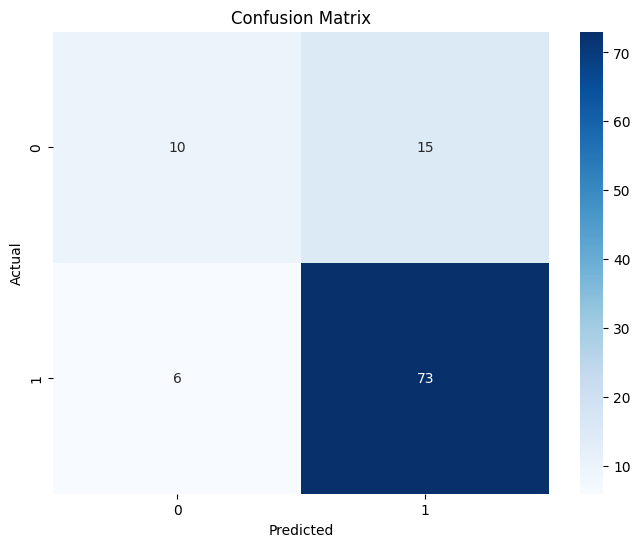

K-Nearest Neighbors Classifier Metrics:
Accuracy: 0.7980769230769231
Precision: 0.7803758741258741
Recall: 0.7980769230769231
F1 Score: 0.7813556751412747
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.40      0.49        25
           1       0.83      0.92      0.87        79

    accuracy                           0.80       104
   macro avg       0.73      0.66      0.68       104
weighted avg       0.78      0.80      0.78       104



In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a KNeighborsClassifier instance with a specified number of neighbors (e.g., n_neighbors=5)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model
knn_classifier.fit(x_train, y_train)

# Predict on the test set
y_pred = knn_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("K-Nearest Neighbors Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

In [61]:
!pip install xgboost


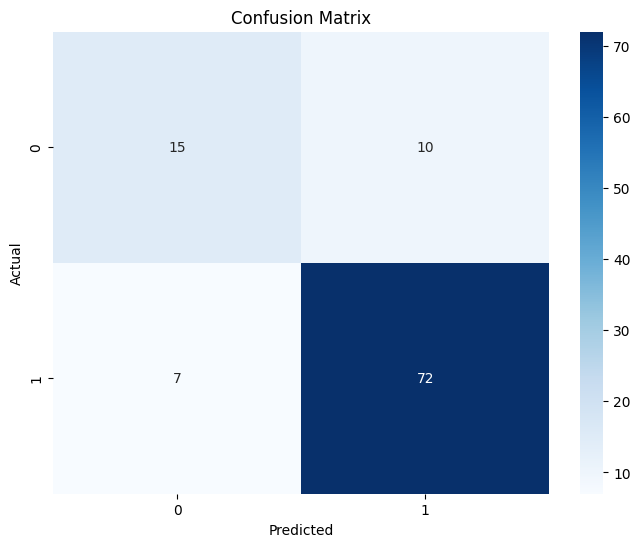

XGBoost Classifier Metrics:
Accuracy: 0.8365384615384616
Precision: 0.8308779634999147
Recall: 0.8365384615384616
F1 Score: 0.832844537516138
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.60      0.64        25
           1       0.88      0.91      0.89        79

    accuracy                           0.84       104
   macro avg       0.78      0.76      0.77       104
weighted avg       0.83      0.84      0.83       104



In [62]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create an XGBClassifier instance
xgb_classifier = XGBClassifier(random_state=42)

# Train the XGBoost model
xgb_classifier.fit(x_train, y_train)

# Predict on the test set
y_pred = xgb_classifier.predict(x_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("XGBoost Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

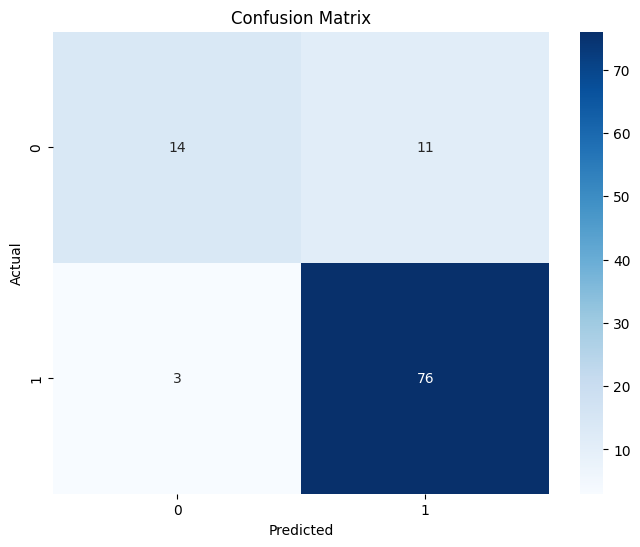

Ensemble Classifier Metrics:
Accuracy: 0.8653846153846154
Precision: 0.8615358610287616
Recall: 0.8653846153846154
F1 Score: 0.8558078467717022
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.56      0.67        25
           1       0.87      0.96      0.92        79

    accuracy                           0.87       104
   macro avg       0.85      0.76      0.79       104
weighted avg       0.86      0.87      0.86       104



In [63]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create individual classifiers
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
xgb_classifier = XGBClassifier(random_state=42)

# Create an ensemble of classifiers using VotingClassifier
ensemble_classifier = VotingClassifier(estimators=[
    ('decision_tree', decision_tree),
    ('random_forest', random_forest),
    ('xgb_classifier', xgb_classifier)
], voting='hard')  # 'hard' for majority vote

# Train the ensemble model
ensemble_classifier.fit(x_train, y_train)


# Predict on the test set
y_pred = ensemble_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("Ensemble Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

In [89]:
import pickle

with open('loan_classifier_rf.pkl', 'wb') as f:
    pickle.dump(random_forest, f)

In [26]:
x_train.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score'],
      dtype='object')

In [44]:
YES_INPUT = [2, 'Not Graduate', 'No',6700000,22700000,18,300]
testdf = pd.DataFrame(np.array(YES_INPUT).reshape(1, -1), columns = x_train.columns)

In [45]:
testdf

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score
0,2,Not Graduate,No,6700000,22700000,18,300


In [46]:
encode_map = {1: "Graduate", 0: "Not Graduate"}
testdf['education'] = [0 if i == "Not Graduate" else 1 for i in testdf['education']]
testdf['self_employed'] = [0 if i == "No" else 1 for i in testdf['self_employed']]

### testdf

In [47]:
random_forest.predict(testdf)

array([0])

In [ ]:
test_df = x_train.head(5)
test_df_p = y_train.head(5)
test_df


In [ ]:
random_forest.predict(test_df)

In [ ]:
pr_d = pd.read_csv('one_col.csv')
pr_d.drop(pr_d[['Unnamed: 0']], axis=1, inplace=True)


In [ ]:
pr_d

In [ ]:
random_forest.predict(pr_d)